In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

<ipython-input-3-0c97a7a738e0>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [4]:
data=pd.read_csv(r'/content/drive/MyDrive/Data_sets/Raw-GPS-data-Kandy-Buses/preprocessed-data-digana_2021_10/clearn_gps_data_with_trip_id.csv')

In [5]:
data.head(10)

id  deviceid           devicetime  latitude  longitude     speed  \
0  574670748       116  2021-10-16 07:08:31  7.299052  80.734410   7.01944   
1  574670749       116  2021-10-16 07:08:46  7.298598  80.733327  19.43850   
2  574670750       116  2021-10-16 07:09:01  7.297437  80.732405  26.45790   
3  574670751       116  2021-10-16 07:09:07  7.297405  80.731912   5.93953   
4  574670752       116  2021-10-16 07:09:22  7.297420  80.731760  11.33910   
5  574674200       116  2021-10-16 07:09:37  7.296582  80.730467  23.21820   
6  574674201       116  2021-10-16 07:09:49  7.295782  80.729912   6.47948   
7  574674202       116  2021-10-16 07:10:04  7.295772  80.729915   0.00000   
8  574674203       116  2021-10-16 07:10:19  7.295772  80.729915   0.00000   
9  574674204       116  2021-10-16 07:10:34  7.295772  80.729915   0.00000   

         date      time  trip_id  
0  2021-10-16  07:08:31      1.0  
1  2021-10-16  07:08:46      1.0  
2  2021-10-16  07:09:01      1.0  
3  2021-10-16  07:09:07      1.0  
4  2021-10-16  07:09:22      1.0  
5  2021-10-16  07:09:37      1.0  
6  2021-10-16  07:09:49      1.0  
7  2021-10-16  07:10:04      1.0  
8  2021-10-16  07:10:19      1.0  
9  2021-10-16  07:10:34      1.0

In [6]:
def reference_time(input_time):# Your input time in "YYYY-MM-DD HH:MM:SS" format
  # Example: Get the date of Monday for a given date
  # Convert the input date to a datetime object
  date_obj = datetime.strptime(input_time, "%Y-%m-%d %H:%M:%S")

  # Find the day of the week (Monday = 0, Tuesday = 1, ..., Sunday = 6)
  day_of_week = date_obj.weekday()

  # Calculate the number of days to subtract to get to the previous Monday
  days_to_subtract = day_of_week

  # Subtract the number of days to get the previous Monday
  previous_monday = date_obj - timedelta(days=days_to_subtract)

  # Format the previous Monday date as a string
  previous_monday = previous_monday.replace(hour=0, minute=0,second
                                                =0)
  previous_monday_str = previous_monday.strftime("%Y-%m-%d %H:%M:%S")
  # Print the previous Monday date
  # print(previous_monday_str)
  return previous_monday
reference_time("2023-06-22 03:05:30")

datetime.datetime(2023, 6, 19, 0, 0)

In [7]:
# Convert time values to seconds since the reference time
time_in_seconds = [(datetime.strptime(row['devicetime'], "%Y-%m-%d %H:%M:%S") - reference_time(row['devicetime'])).total_seconds()
                   for index,row in data.iterrows()]
time_array = [time for time in time_in_seconds]
data['time_in_seconds']=time_array

In [8]:
data.head(10)

id  deviceid           devicetime  latitude  longitude     speed  \
0  574670748       116  2021-10-16 07:08:31  7.299052  80.734410   7.01944   
1  574670749       116  2021-10-16 07:08:46  7.298598  80.733327  19.43850   
2  574670750       116  2021-10-16 07:09:01  7.297437  80.732405  26.45790   
3  574670751       116  2021-10-16 07:09:07  7.297405  80.731912   5.93953   
4  574670752       116  2021-10-16 07:09:22  7.297420  80.731760  11.33910   
5  574674200       116  2021-10-16 07:09:37  7.296582  80.730467  23.21820   
6  574674201       116  2021-10-16 07:09:49  7.295782  80.729912   6.47948   
7  574674202       116  2021-10-16 07:10:04  7.295772  80.729915   0.00000   
8  574674203       116  2021-10-16 07:10:19  7.295772  80.729915   0.00000   
9  574674204       116  2021-10-16 07:10:34  7.295772  80.729915   0.00000   

         date      time  trip_id  time_in_seconds  
0  2021-10-16  07:08:31      1.0         457711.0  
1  2021-10-16  07:08:46      1.0         457726.0  
2  2021-10-16  07:09:01      1.0         457741.0  
3  2021-10-16  07:09:07      1.0         457747.0  
4  2021-10-16  07:09:22      1.0         457762.0  
5  2021-10-16  07:09:37      1.0         457777.0  
6  2021-10-16  07:09:49      1.0         457789.0  
7  2021-10-16  07:10:04      1.0         457804.0  
8  2021-10-16  07:10:19      1.0         457819.0  
9  2021-10-16  07:10:34      1.0         457834.0

**Test Multigraph visualizationa**

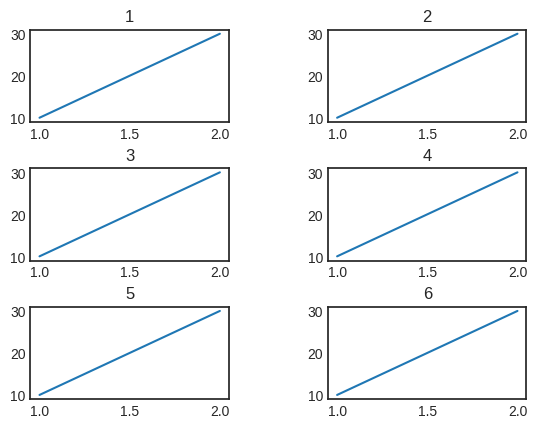

In [9]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(1, 7):
    ax = fig.add_subplot(3, 2, i).set_title(i)
    plt.plot([1,2], [10, 30])
    # ax.text(0.5, 0.5, str((2, 3, i)),fontsize=18, ha='center')

**Multigraph visualization of bus trip wise**

In [10]:
trip_ids = data["trip_id"].unique()

In [11]:
len(trip_ids)

1706

In [16]:
fig = plt.figure(figsize=(150,300))
fig.subplots_adjust(hspace=2, wspace=0.2)
for id in range(1,101):
    ax = fig.add_subplot(100, 5, id).set_title(id)
    plt.plot(data[data['trip_id']==id]['time_in_seconds'],data[data['trip_id']==id]['speed'])
    # ax.text(0.5, 0.5, str((2, 3, i)),fontsize=18, ha='center')